In [ ]:
#Python program that uses dual moving average crossover to determine when to buy and sell stocks
#Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [ ]:
#Store the data
TSLA = pd.read_csv('TSLA.csv')
#Show the data
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-13,232.009995,232.470001,224.500000,227.009995,227.009995,10834800
1,2019-05-14,229.300003,234.500000,228.000000,232.309998,232.309998,7252400
2,2019-05-15,229.320007,232.440002,225.250000,231.949997,231.949997,7296000
3,2019-05-16,229.490005,231.000000,226.500000,228.330002,228.330002,7483300
4,2019-05-17,221.960007,222.240005,208.919998,211.029999,211.029999,17786700
...,...,...,...,...,...,...,...
248,2020-05-06,776.500000,789.799988,761.109985,782.580017,782.580017,11123200
249,2020-05-07,777.210022,796.400024,772.349976,780.039978,780.039978,11527700
250,2020-05-08,793.770020,824.000000,787.010010,819.419983,819.419983,16130100
251,2020-05-11,790.510010,824.000000,785.000000,811.289978,811.289978,16471100


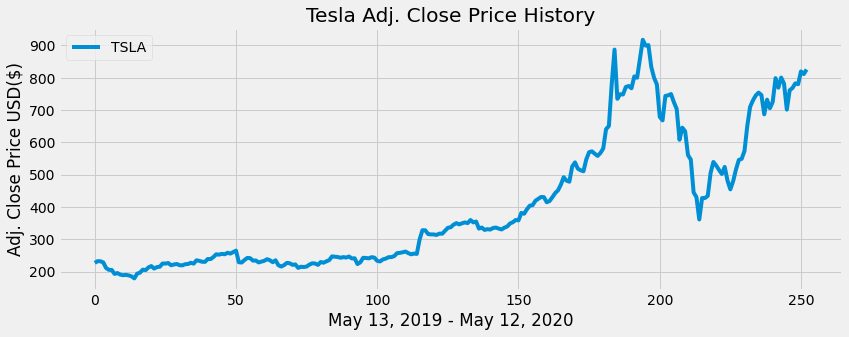

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label='TSLA')
plt.title('Tesla Adj. Close Price History')
plt.xlabel('May 13, 2019 - May 12, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a simple moving average with a 30-day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = TSLA['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,651.892337
249,659.918670
250,669.627337
251,679.525003


In [ ]:
#Create a simple moving 100-day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = TSLA['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,607.225901
249,611.429501
250,616.039801
251,620.337701


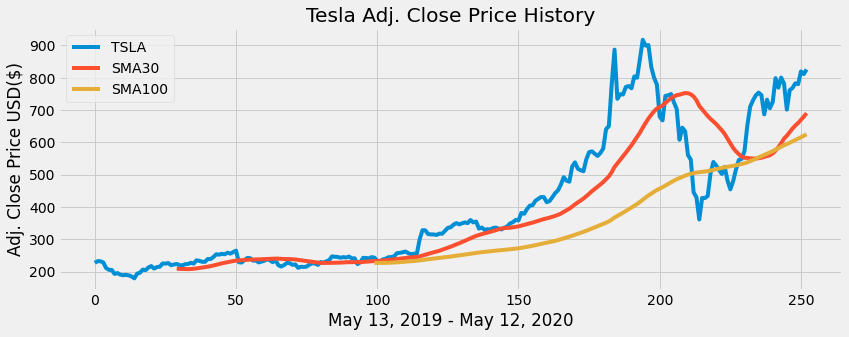

In [ ]:
#Visualize the new data
plt.figure(figsize=(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label= 'SMA100')
plt.title('Tesla Adj. Close Price History')
plt.xlabel('May 13, 2019 - May 12, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a new DataFrame for storing all the data
data = pd.DataFrame()
data['TSLA'] = TSLA['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,TSLA,SMA30,SMA100
0,227.009995,NaN,NaN
1,232.309998,NaN,NaN
2,231.949997,NaN,NaN
3,228.330002,NaN,NaN
4,211.029999,NaN,NaN
...,...,...,...
248,782.580017,651.892337,607.225901
249,780.039978,659.918670,611.429501
250,819.419983,669.627337,616.039801
251,811.289978,679.525003,620.337701


In [ ]:
#Create a function to signal when to buy and sell the asset
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['TSLA'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [ ]:
#Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#Show the data
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,227.009995,NaN,NaN,NaN,NaN
1,232.309998,NaN,NaN,NaN,NaN
2,231.949997,NaN,NaN,NaN,NaN
3,228.330002,NaN,NaN,NaN,NaN
4,211.029999,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,782.580017,651.892337,607.225901,NaN,NaN
249,780.039978,659.918670,611.429501,NaN,NaN
250,819.419983,669.627337,616.039801,NaN,NaN
251,811.289978,679.525003,620.337701,NaN,NaN


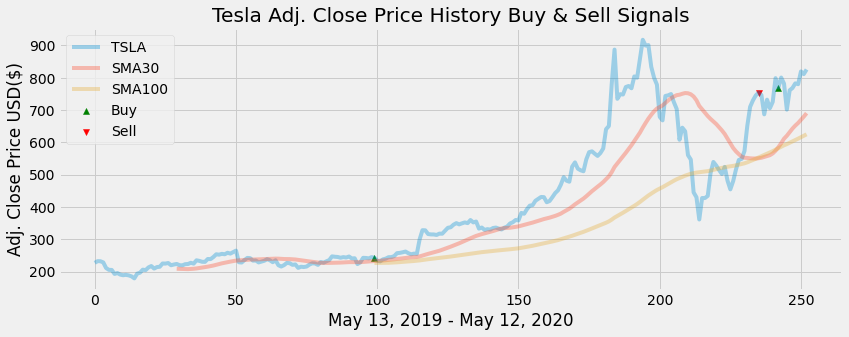

In [ ]:
#Visualize the data & strategy for buying/selling the stock.
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['TSLA'], label='TSLA', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Tesla Adj. Close Price History Buy & Sell Signals')
plt.xlabel('May 13, 2019 - May 12, 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()